# Testing Algorithms

This notebook is made for testing the algorithms used in our project i.e. Image Classification, Toxic Text Detection and News Similarity Check Algorithm. Following are the steps to execute the program:

## Step 1: Importing the libraries

Start by executing the code given below. The code can be executed by selecting the cell clicking on the run button given above in the navigation bar or simply by clicking Shift + Enter. 
If you do not have any library already installed in your system, you can install it using the command:

!pip install library_name

Or you could refer to this website https://pypi.org/project to find the syntax and versions for downloading libraries. 

You can download tesseract.ocr from here https://github.com/UB-Mannheim/tesseract/wiki. 

You can also refer to the README.md provided in our github repository - https://github.com/letstrytogether/Spiders/blob/master/README.md

In [1]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet as wn
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from pandas import DataFrame as df
nltk.download('stopwords')
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
import pickle
import anvil
import anvil.media
import cv2
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pytesseract import *
#Paste your path to tesseract.exe below
pytesseract.tesseract_cmd= r'C:\Users\Sakshi\AppData\Local\Tesseract-OCR\tesseract.exe'

hindi_toxic = pd.read_csv('Hindi.csv')
filename_1 = 'TextModel_SVM.sav'
filename_2 = 'Vocabulary.sav'

Using TensorFlow backend.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Step 2: Defining the Functions of  Algorithms

Start by executing the code given below. This is the 'Toxic Text Detection' algorithm that takes the input text and detects whether the sentiment of the text is negative or positive/neutral.

In [2]:
def comment_processing(input_data):
    clf = pickle.load(open(filename_1, 'rb'))
    loaded_vec =  pickle.load(open(filename_2, "rb"))
    loaded_vec = CountVectorizer(decode_error="replace",vocabulary=loaded_vec)
    text = []
    text.append(input_data)
    score = 0
    keyword = re.sub('[^a-zA-Z]',' ',text[0])
    for i in keyword.split(' '):
        for j in hindi_toxic['Words']:
            if j == i:
                score = 1
                break
    if score == 1:
        print('Text: ', text)
        print('Score: ', score)
        print('Result: Text is toxic.')
    else:
            X = loaded_vec.transform(text)
            score = clf.predict(X)
            print('Text: ', text[0])
            print('Score: ', score[0])
            if score[0] == 1:
                print('Result: Text is toxic.')
            else:
                print('Result: Text is not toxic.') 

Next, execute the code given below. This is the 'Image Classification' algorithm that takes any input image, gif or video and determines whether it contains any toxic content. 

In [3]:
def image_processing(path):
    model = pickle.load(open(r'finalized_model.sav', 'rb'))
    image1 = ['jpg', 'jpeg', 'png','jfif']
    video1 = ['mp4', 'gif']
    result = 0
    path = path
    extension = path.split('.')[-1]
    print(extension)
    if extension in image1:
        img = Image.open(path)
        plt.imshow(img)
        test_img = keras.preprocessing.image.load_img(path, target_size = (32,32))
        print(type(test_img))
        test_img = tf.keras.preprocessing.image.img_to_array(test_img)
        print(type(test_img))
        test_img = np.expand_dims(test_img, axis = 0)
        result = model.predict(test_img)
        print(result)
        if result[0][4] == 1 or result[0][5] == 1 or [0][0] == 1:
            print('Result: Okay')
            return ('Okay')
        else:
            print('Result: Not Okay') 
            return('Not Okay')

    if extension in video1:
        res = []
        vidcap = cv2.VideoCapture(path)
        success, image = vidcap.read()
        count = 0
        while success:
            success,image = vidcap.read()
            if success:
                print('read a new frame:', success)
                count+=1
                images = cv2.resize(image, (32,32),3)
                print(image.shape)
                test_img = np.expand_dims(images, axis = 0)
                result = model.predict(test_img)
                res.append(result)
            else:
                break

        print(len(res))
        okay = 0
        notokay = 0
        for result in res:
            print(res)
            if result[0][4] == 1 or result[0][5] == 1 or [0][0] == 1:
                okay+=1 
            else:
                notokay+=1
        print(okay)
        print(notokay)
        if okay > notokay:
            print('Result: Okay')
            return('Okay')
        else:
            print('Result: Not Okay')
            return('Not Okay')


Execute the code given below. The code extracts text from image and sends the text to 'Toxic Text Detection' algorithm for further processing. 

In [4]:
def imagetext_processing(path):
        img = keras.preprocessing.image.load_img(path)
        text=pytesseract.image_to_string(img)
        score = comment_processing(text)
        img = Image.open(path)
        plt.imshow(img)
        return (score)
    

Lastly, execute the cells given below. This is the 'News Similarity Check' algorithm that takes an input news, finds any similar news in the dataset created after scraping DD News and Zee News and then outputs the most similar news found.

The csv file used here as the dataset to find the similar news is 'COVID.csv'. You can try scraping news from 'DDNewsWebScraperGlobal_Latest.ipynb' or 'ZeeNewsWebScraperGlobal_Latest.ipynb'.

In [5]:
def clean_text(keyword):
    temp = []
    keyword = re.sub('[^a-zA-Z]',' ',keyword)
    ss=nltk.tokenize.sent_tokenize(keyword)
    tokenized_sent=[nltk.word_tokenize(sent) for sent in ss]
    pos_sentences=[nltk.pos_tag(sent) for sent in tokenized_sent]
    for i in pos_sentences:
        for j in i:
            if j[1] == 'NN' or j[1] == 'NNP' or j[1] == 'NNPS':
                temp.append(j[0])
    return temp
            

In [13]:
def news_processing(sentence):
        sentence_1 = sentence
        sentence = clean_text(sentence)
        for word in sentence:
            #Enter the path to your csv file, for example:
            data = r'C:\Data\COVID\data\COVID.csv'
            #data = r'path to your csv file'
            data=pd.read_csv(data,  encoding='cp1252')
            data_1= data["NEWS"]
            data_2 = data['NEWS URL']
            super_1 = []
            super_2 = []
            super_3 = []
            focus_sentence = sentence_1
            focus_sentence = " ".join(re.findall("[a-zA-Z]+", focus_sentence)) 
            res = []
            sent_list = []
            urls = []
            for row,url in zip(data_1,data_2):
                sent=sent_tokenize(row)
                for sentence in sent:
                    sentence = " ".join(re.findall("[a-zA-Z]+", sentence)) 
                    corpus = [focus_sentence , sentence]
                    vectorizer = TfidfVectorizer()
                    trsfm=vectorizer.fit_transform(corpus)
                    result = cosine_similarity(trsfm)[0][1]
                    res.append(result.tolist())
                    sent_list.append(sentence)
                    urls.append(url)

            final = res.index(max(res))
            final_sentence = sent_list[final]
            final_url = urls[final]
            super_1.append(final)
            super_2.append(final_sentence)
            super_3.append(final_url)

        final = super_1.index(max(super_1))
        final_sentence = super_2[final]
        urls = super_3[final]


        return ('Input News: ',sentence_1, 'Similar News', final_sentence,'Similarity Score: ', max(res),urls)

## Step 3: Testing the Algorithms

First, we will test the 'Toxic Text Detection' algortithm. Execute the cell given below by passing any sentence you want to test to the function as shown below.

In [17]:
comment_processing('i will rape you')

Text:  i will rape you
Score:  1
Result: Text is toxic.


In [18]:
comment_processing('i will not rape you')

Text:  i will not rape you
Score:  0
Result: Text is not toxic.


Next, we will test the 'Image Classfication' algorithm. Execute the cell given below by passing the relative path to any image as shown below.

jpg
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
[[0. 0. 1. 0. 0. 0.]]
Result: Not Okay


'Not Okay'

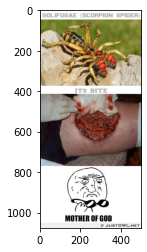

In [22]:
image_processing(r'C:\Users\Sakshi\Documents\Project\Testing\6.jpg')

Then, we will see how the text from an image is extracted and its toxicity is determined. Execute the cell given below by passing the relative path to any image containing text.

Text:  you bitch i will rape you
Score:  1
Result: Text is toxic.


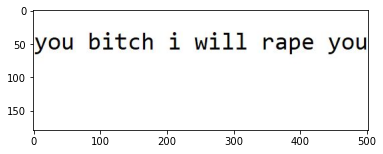

In [9]:
imagetext_processing(r'C:\Users\Sakshi\Documents\Project\Testing\image text test.JPG')

Lastly, you can test the 'News Similarity Check' algorithm by formulating a news/tweet/post preferably from the COVID.csv file provided for convinience and passing it to the function given below.

In [14]:
news_processing('Guidelines for unlock 4 will come into force very soon')

('Input News: ',
 'Guidelines for unlock 4 will come into force very soon',
 'Similar News',
 'The guidelines issued by the government for Unlock will come into force on Tuesday',
 'Similarity Score: ',
 0.42495679101934586,
 'http://ddnews.gov.in/national/unlock-4-guidelines-covid-non-containment-zones-come-force')

## END